## Trabalho 1 D2APR 
### Equipe
<p> Evandro Henrique Couto de Paula </p>
<p> Letícia Paiva de Oliveira </p>

# 1. Frame the problem

## 1.1. Contexto
<p>A cidade de São Paulo é a maior cidade do Brasil contando com aproximadamente 12 milhões de habiltantes contando com um PIB per capta de 58.691,90[1], no entanto a cidade enfrenta reais problemas habitacionais onde existe um déficit nas unidades habitacionais na cidade.[2].</p>
<p>Mesmo em face dos problemas habitacionais o mercado imobiliário da metrópole anda muito aquecido o ano de 2020 e 2021 representou o maior aumento de vendas de imóveis dos útimos 6 anos[3].</p>

Referencias:<br>
[1]Instituto Brasileiro de Geografia e Estatistica - https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama (acessado em 29/11/2021).<br>
[2]G1 São Paulo - https://g1.globo.com/sp/sao-paulo/noticia/cidade-de-sp-tem-deficit-de-358-mil-moradias-e-1385-imoveis-ociosos.ghtml (acessado em 29/11/2021)
[3]G1 São Paulo - https://g1.globo.com/sp/sao-paulo/noticia/2021/09/14/cidade-de-sao-paulo-bate-recorde-historico-de-venda-de-imoveis-em-meio-a-pandemia-especialista-ve-contradicao.ghtml (acessado em 29/11/2021)


## 1.2 Desafio
<p>Trabalhar um modelo que seja capaz de predizer os preços de compras e aluguéis de imóveis na cidade São Paulo.</p>

## 1.3 Observações

O trabalho conta com analíses desenvolvidas pelos integrantes do grupo, com auxilio dos materiais utilizados em aula e estudo de analíses de outras fontes principalmente o keagle nessas analíses destam-se os trabalhos encontrados em https://www.kaggle.com/cmapereira/real-estate-sao-paulo e https://www.kaggle.com/juxwzera/predictions-for-price

# 2. Obtendo os dados

## 2.1. Carregando os dados

In [1]:
import pandas as pd

imoveis = pd.read_csv('./datasets/sao-paulo-properties-april-2019.csv')

In [2]:
imoveis.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [3]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

<p>Cada linha da base de dados representa um imóvel na cidade de são paulo</p>
<p>Cada imóvel é representado por 15 atributos sendo 12 numéricos e 3 categóricos</p>   
<ul>
    <ol><b>Price</b> é o preco do imóvel, porém é importante ressaltar a variação dos imóveis alugados e imóveis a venda</ol>
    <ol><b>Condo</b> é o preço do condomínio do imóvel esse valor pode ser 0 quando o não informado ou quando o imóvel não possui um valor de condomínio atrelado</ol>
    <ol><b>Size</b> tamanho do imóvel em m²</ol>
    <ol><b>Rooms</b> quantidades de quartos do imóvel</ol>
    <ol><b>Toilets</b> quantidade de banheiros do imóvel</ol>
    <ol><b>Suites</b> quantidades de suites do imóvel quando esse possui</ol>
    <ol><b>Parking</b> variável que informa se o imóvel possui ou garegem/estacionamento</ol>
    <ol><b>Elevator</b> Variavel que informa se o imóvel possui ou não elevadores</ol>
    <ol><b>Furnished</b> indica se o imóvel é mobiliado ou não</ol>
    <ol><b>Swimming Pool</b> mostra se o imóvel tem piscina</ol>
    <ol><b>New</b> indica se é um novo empreendimento</ol>
    <ol><b>Negotiation Type</b> indica se o imóvel está a venda ou para alugar</ol>
    <ol><b>Property Type</b> indica se o imóvel é im</ol>
    <ol><b>District, Latitude, Longitude</b> são usados para idenficar a localização dos imóveis</ol>
</ul>

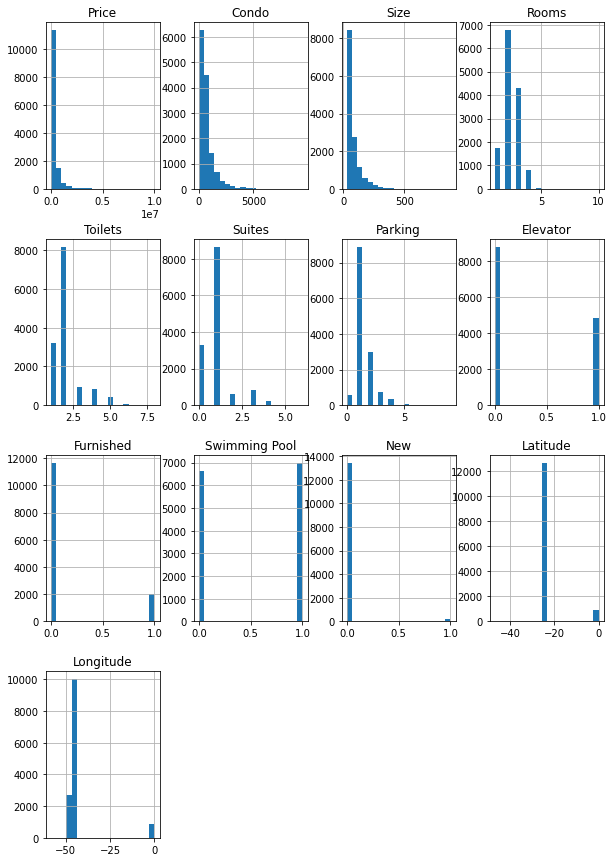

In [4]:
imoveis.hist(bins=20, figsize=(10, 15))
display()

## 2.2. Criando conjunto de teste

In [5]:
imoveis.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13635    False
13636    False
13637    False
13638    False
13639    False
Length: 13640, dtype: bool

In [6]:
#dropando registros duplicados
imoveis= imoveis.drop_duplicates(keep=False)

In [7]:
imoveis

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0         930    220    47      2        2       1        1         0   
1        1000    148    45      2        2       1        1         0   
2        1000    100    48      2        2       1        1         0   
3        1000    200    48      2        2       1        1         0   
4        1300    410    55      2        2       1        1         1   
...       ...    ...   ...    ...      ...     ...      ...       ...   
13635  265000    420    51      2        1       0        1         0   
13636  545000    630    74      3        2       1        2         0   
13637  515000   1100   114      3        3       1        1         0   
13638  345000     48    39      1        2       1        1         0   
13639  161987      0    44      2        1       0        1         0   

       Furnished  Swimming Pool  New                 District  \
0              0              0    0    Artur Alvim/São Paulo   
1              0              0    0    Artur Alvim/São Paulo   
2              0              0    0    Artur Alvim/São Paulo   
3              0              0    0    Artur Alvim/São Paulo   
4              0              0    0    Artur Alvim/São Paulo   
...          ...            ...  ...                      ...   
13635          0              0    0      Jabaquara/São Paulo   
13636          0              1    0      Jabaquara/São Paulo   
13637          0              1    0      Jabaquara/São Paulo   
13638          1              1    0      Jabaquara/São Paulo   
13639          0              0    0  Jardim Ângela/São Paulo   

      Negotiation Type Property Type   Latitude  Longitude  
0                 rent     apartment -23.543138 -46.479486  
1                 rent     apartment -23.550239 -46.480718  
2                 rent     apartment -23.542818 -46.485665  
3                 rent     apartment -23.547171 -46.483014  
4                 rent     apartment -23.525025 -46.482436  
...                ...           ...        ...        ...  
13635             sale     apartment -23.653004 -46.635463  
13636             sale     apartment -23.648930 -46.641982  
13637             sale     apartment -23.649693 -46.649783  
13638             sale     apartment -23.652060 -46.637046  
13639             sale     apartment -23.613391 -46.523109  

[13081 rows x 16 columns]

In [8]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13081 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13081 non-null  int64  
 1   Condo             13081 non-null  int64  
 2   Size              13081 non-null  int64  
 3   Rooms             13081 non-null  int64  
 4   Toilets           13081 non-null  int64  
 5   Suites            13081 non-null  int64  
 6   Parking           13081 non-null  int64  
 7   Elevator          13081 non-null  int64  
 8   Furnished         13081 non-null  int64  
 9   Swimming Pool     13081 non-null  int64  
 10  New               13081 non-null  int64  
 11  District          13081 non-null  object 
 12  Negotiation Type  13081 non-null  object 
 13  Property Type     13081 non-null  object 
 14  Latitude          13081 non-null  float64
 15  Longitude         13081 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [9]:
imoveis.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [10]:
#criando o campo de bairro, pois essa informação é mais relevante do que a cidade no dataset
imoveis[['District', 'City']] = imoveis['District'].str.split('/', expand=True)

In [11]:
#separando os imóveis a que estão disponíveis para locação
alugados = imoveis['Negotiation Type'] == 'rent'
imoveis_alugel = imoveis[alugados]

In [12]:
#separando os imóveis a que estão disponíveis para venda
vendese = imoveis['Negotiation Type'] == 'sale'
imoveis_venda = imoveis[vendese]

### analise dos dois novos datasets

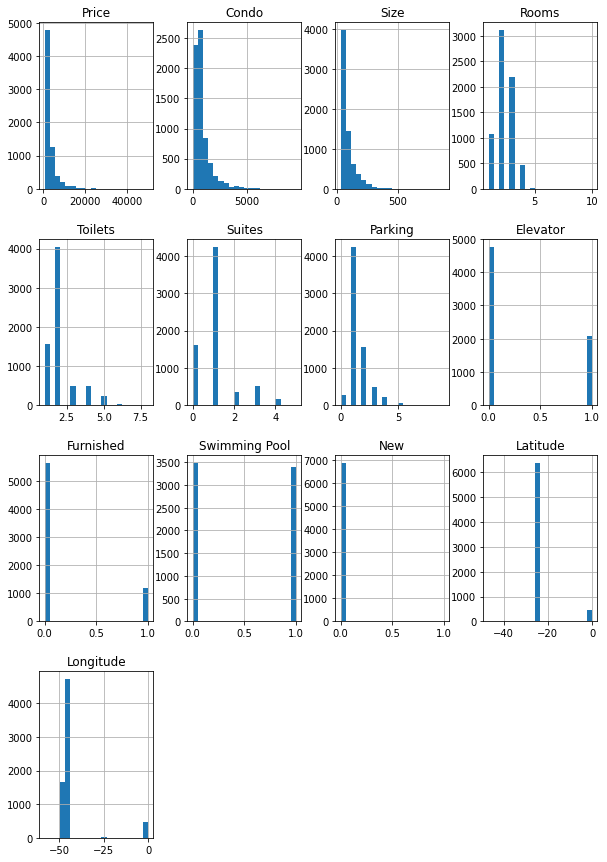

In [13]:
imoveis_alugel.hist(bins=20, figsize=(10, 15))
display()

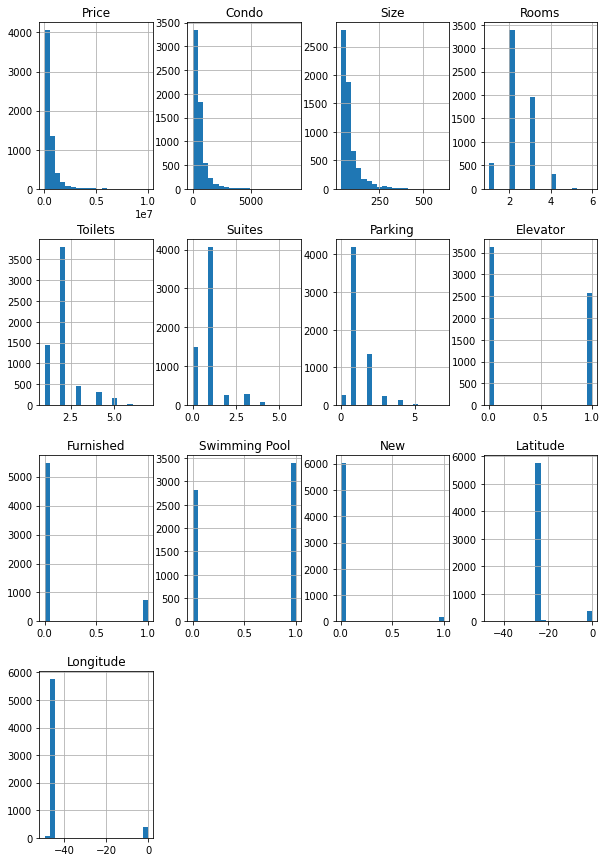

In [14]:
imoveis_venda.hist(bins=20, figsize=(10, 15))
display()

In [15]:
#descrições do imóveis alugados
imoveis_alugel.describe()

Price        Condo         Size        Rooms      Toilets  \
count   6867.000000  6867.000000  6867.000000  6867.000000  6867.000000   
mean    3119.002476   837.020387    90.371924     2.311781     2.120140   
std     3584.297196   845.583461    64.894050     0.830657     1.005945   
min      480.000000     0.000000    30.000000     1.000000     1.000000   
25%     1400.000000   400.000000    52.000000     2.000000     2.000000   
50%     2000.000000   600.000000    68.000000     2.000000     2.000000   
75%     3400.000000  1000.000000   101.000000     3.000000     2.000000   
max    50000.000000  9500.000000   880.000000    10.000000     8.000000   

            Suites      Parking     Elevator    Furnished  Swimming Pool  \
count  6867.000000  6867.000000  6867.000000  6867.000000    6867.000000   
mean      1.036843     1.464541     0.305228     0.176351       0.492792   
std       0.891890     0.899567     0.460537     0.381146       0.499984   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     0.000000     0.000000       0.000000   
50%       1.000000     1.000000     0.000000     0.000000       0.000000   
75%       1.000000     2.000000     1.000000     0.000000       1.000000   
max       5.000000     9.000000     1.000000     1.000000       1.000000   

               New     Latitude    Longitude  
count  6867.000000  6867.000000  6867.000000  
mean      0.000874   -22.013829   -43.459049  
std       0.029548     6.002641    11.748390  
min       0.000000   -46.749039   -58.364352  
25%       0.000000   -23.598121   -46.690405  
50%       0.000000   -23.556137   -46.646081  
75%       0.000000   -23.522918   -46.586415  
max       1.000000     0.000000     0.000000

In [16]:
#descrições dos imóveis à venda
imoveis_venda.describe()

Price        Condo         Size        Rooms      Toilets  \
count  6.214000e+03  6214.000000  6214.000000  6214.000000  6214.000000   
mean   6.171834e+05   546.541358    79.327004     2.328774     2.047473   
std    7.487806e+05   629.365427    51.261551     0.713092     0.923520   
min    4.200000e+04     0.000000    30.000000     1.000000     1.000000   
25%    2.500000e+05   174.250000    50.000000     2.000000     2.000000   
50%    3.850000e+05   400.000000    62.000000     2.000000     2.000000   
75%    6.800000e+05   700.000000    88.000000     3.000000     2.000000   
max    1.000000e+07  8920.000000   620.000000     6.000000     7.000000   

            Suites      Parking     Elevator    Furnished  Swimming Pool  \
count  6214.000000  6214.000000  6214.000000  6214.000000    6214.000000   
mean      0.938204     1.335694     0.415031     0.119730       0.546186   
std       0.775684     0.757573     0.492767     0.324671       0.497902   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     0.000000     0.000000       0.000000   
50%       1.000000     1.000000     0.000000     0.000000       1.000000   
75%       1.000000     2.000000     1.000000     0.000000       1.000000   
max       6.000000     7.000000     1.000000     1.000000       1.000000   

               New     Latitude    Longitude  
count  6214.000000  6214.000000  6214.000000  
mean      0.030093   -22.112693   -43.673251  
std       0.170858     5.788184    11.330692  
min       0.000000   -46.734483   -49.337815  
25%       0.000000   -23.592848   -46.673435  
50%       0.000000   -23.549981   -46.628542  
75%       0.000000   -23.512746   -46.533766  
max       1.000000     0.000000     0.000000

In [17]:
from sklearn.model_selection import train_test_split

venda_training, venda_test = train_test_split(imoveis_venda, test_size=0.2, random_state=42)

aluguel_training, alugel_test = train_test_split(imoveis_alugel, test_size=0.2, random_state=42)

In [18]:
venda_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 8001 to 6060
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             4971 non-null   int64  
 1   Condo             4971 non-null   int64  
 2   Size              4971 non-null   int64  
 3   Rooms             4971 non-null   int64  
 4   Toilets           4971 non-null   int64  
 5   Suites            4971 non-null   int64  
 6   Parking           4971 non-null   int64  
 7   Elevator          4971 non-null   int64  
 8   Furnished         4971 non-null   int64  
 9   Swimming Pool     4971 non-null   int64  
 10  New               4971 non-null   int64  
 11  District          4971 non-null   object 
 12  Negotiation Type  4971 non-null   object 
 13  Property Type     4971 non-null   object 
 14  Latitude          4971 non-null   float64
 15  Longitude         4971 non-null   float64
 16  City              4971 non-null   objec

In [19]:
venda_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 11820 to 12463
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1243 non-null   int64  
 1   Condo             1243 non-null   int64  
 2   Size              1243 non-null   int64  
 3   Rooms             1243 non-null   int64  
 4   Toilets           1243 non-null   int64  
 5   Suites            1243 non-null   int64  
 6   Parking           1243 non-null   int64  
 7   Elevator          1243 non-null   int64  
 8   Furnished         1243 non-null   int64  
 9   Swimming Pool     1243 non-null   int64  
 10  New               1243 non-null   int64  
 11  District          1243 non-null   object 
 12  Negotiation Type  1243 non-null   object 
 13  Property Type     1243 non-null   object 
 14  Latitude          1243 non-null   float64
 15  Longitude         1243 non-null   float64
 16  City              1243 non-null   obj

In [20]:
alugel_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 1662 to 5311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1374 non-null   int64  
 1   Condo             1374 non-null   int64  
 2   Size              1374 non-null   int64  
 3   Rooms             1374 non-null   int64  
 4   Toilets           1374 non-null   int64  
 5   Suites            1374 non-null   int64  
 6   Parking           1374 non-null   int64  
 7   Elevator          1374 non-null   int64  
 8   Furnished         1374 non-null   int64  
 9   Swimming Pool     1374 non-null   int64  
 10  New               1374 non-null   int64  
 11  District          1374 non-null   object 
 12  Negotiation Type  1374 non-null   object 
 13  Property Type     1374 non-null   object 
 14  Latitude          1374 non-null   float64
 15  Longitude         1374 non-null   float64
 16  City              1374 non-null   objec

In [21]:
aluguel_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5493 entries, 4723 to 927
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             5493 non-null   int64  
 1   Condo             5493 non-null   int64  
 2   Size              5493 non-null   int64  
 3   Rooms             5493 non-null   int64  
 4   Toilets           5493 non-null   int64  
 5   Suites            5493 non-null   int64  
 6   Parking           5493 non-null   int64  
 7   Elevator          5493 non-null   int64  
 8   Furnished         5493 non-null   int64  
 9   Swimming Pool     5493 non-null   int64  
 10  New               5493 non-null   int64  
 11  District          5493 non-null   object 
 12  Negotiation Type  5493 non-null   object 
 13  Property Type     5493 non-null   object 
 14  Latitude          5493 non-null   float64
 15  Longitude         5493 non-null   float64
 16  City              5493 non-null   object

In [22]:
#salvando datasets de aluguel 
alugel_test.to_csv('./datasets/aluguel_test.csv', index=False)
aluguel_training.to_csv('./datasets/aluguel_training.csv', index=False)

In [23]:
#salvando datasets de venda 
venda_test.to_csv('./datasets/venda_test.csv', index=False)
venda_training.to_csv('./datasets/venda_training.csv', index=False)

# 3. Explorando os dados

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

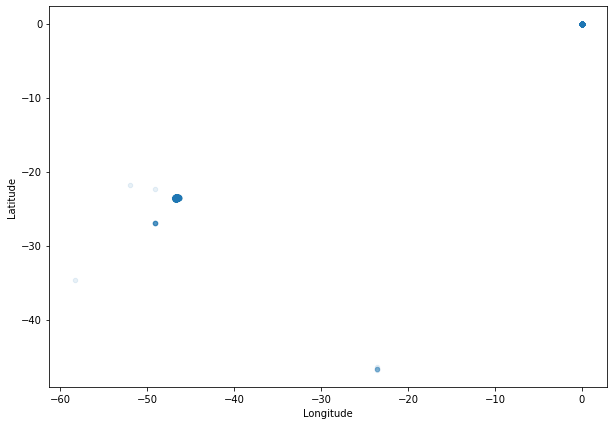

In [24]:
#distribuição dos imóveis em para aluguel
aluguel_training.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10,7))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

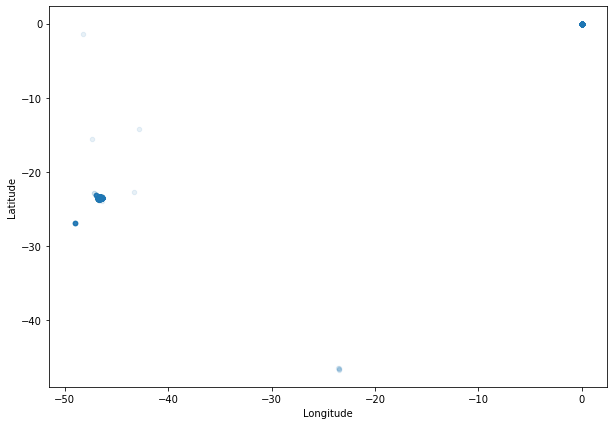

In [25]:
#distribuição dos imóveis em para aluguel
venda_training.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10,7))

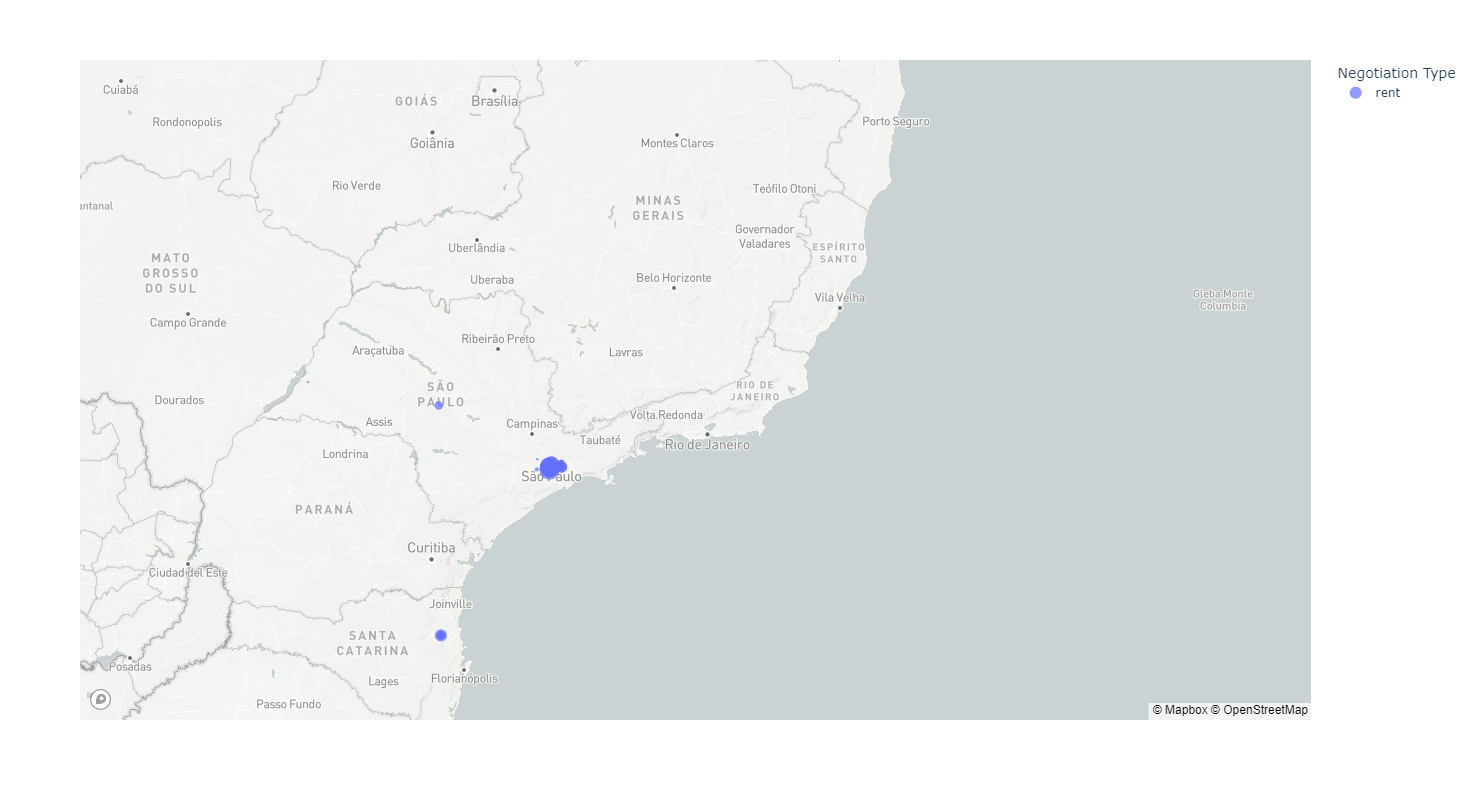

In [26]:
import plotly.express as px


#Mostrando os imóveis disponíveis para locação
px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(aluguel_training, lat="Latitude", lon="Longitude", color="Negotiation Type", size="Price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

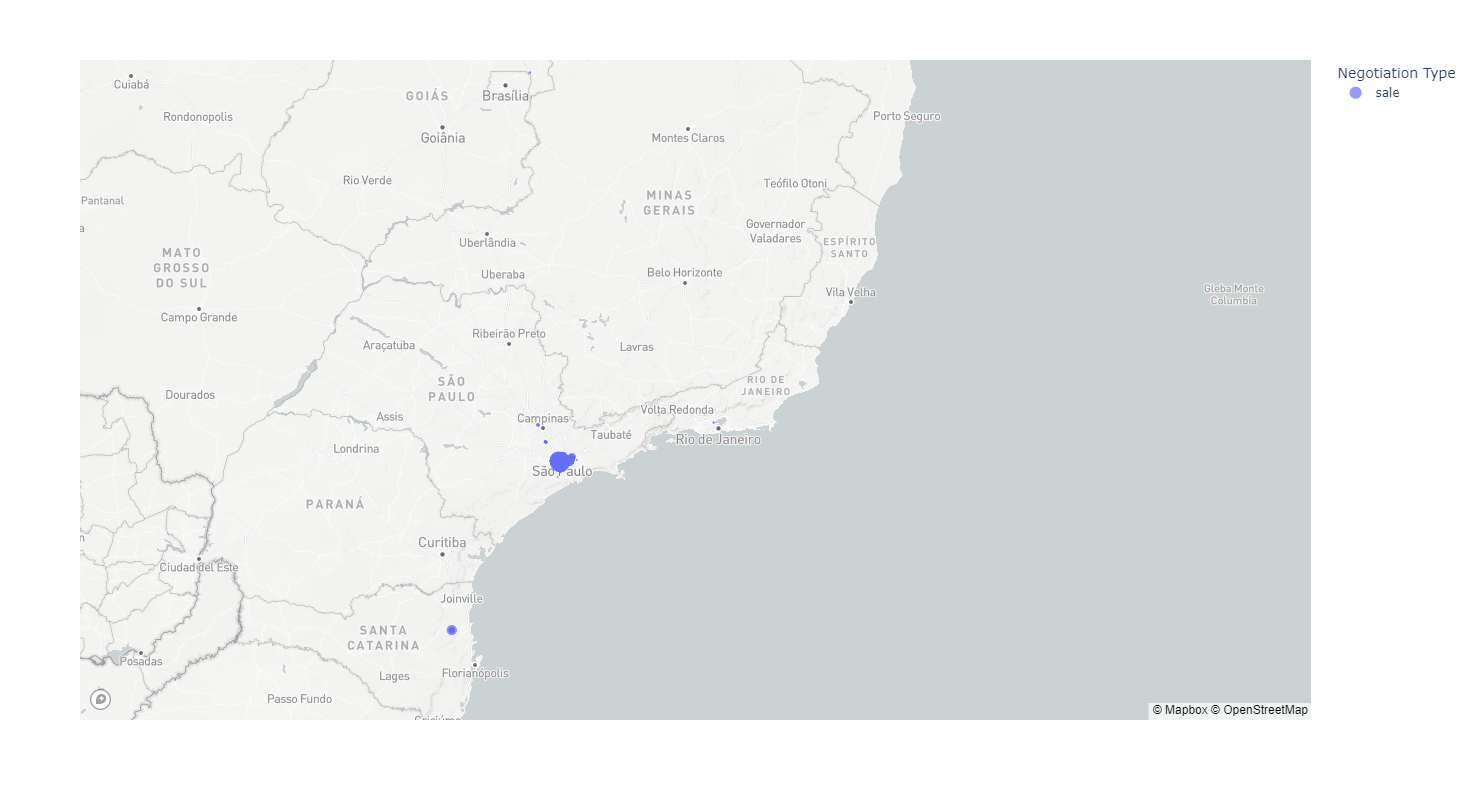

In [27]:
#Mostrando os imóveis a venda 
px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(venda_training, lat="Latitude", lon="Longitude", color="Negotiation Type", size="Price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

In [28]:
# A plotagem indica que os dados referentes a latitude e longitude são inconsistentes, por essa razão eles serão removidos, pois esses parametros não serão considerados nos modelos
aluguel_training = aluguel_training.drop(columns=['Longitude', 'Latitude'])

venda_training = venda_training.drop(columns=['Longitude', 'Latitude'])

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

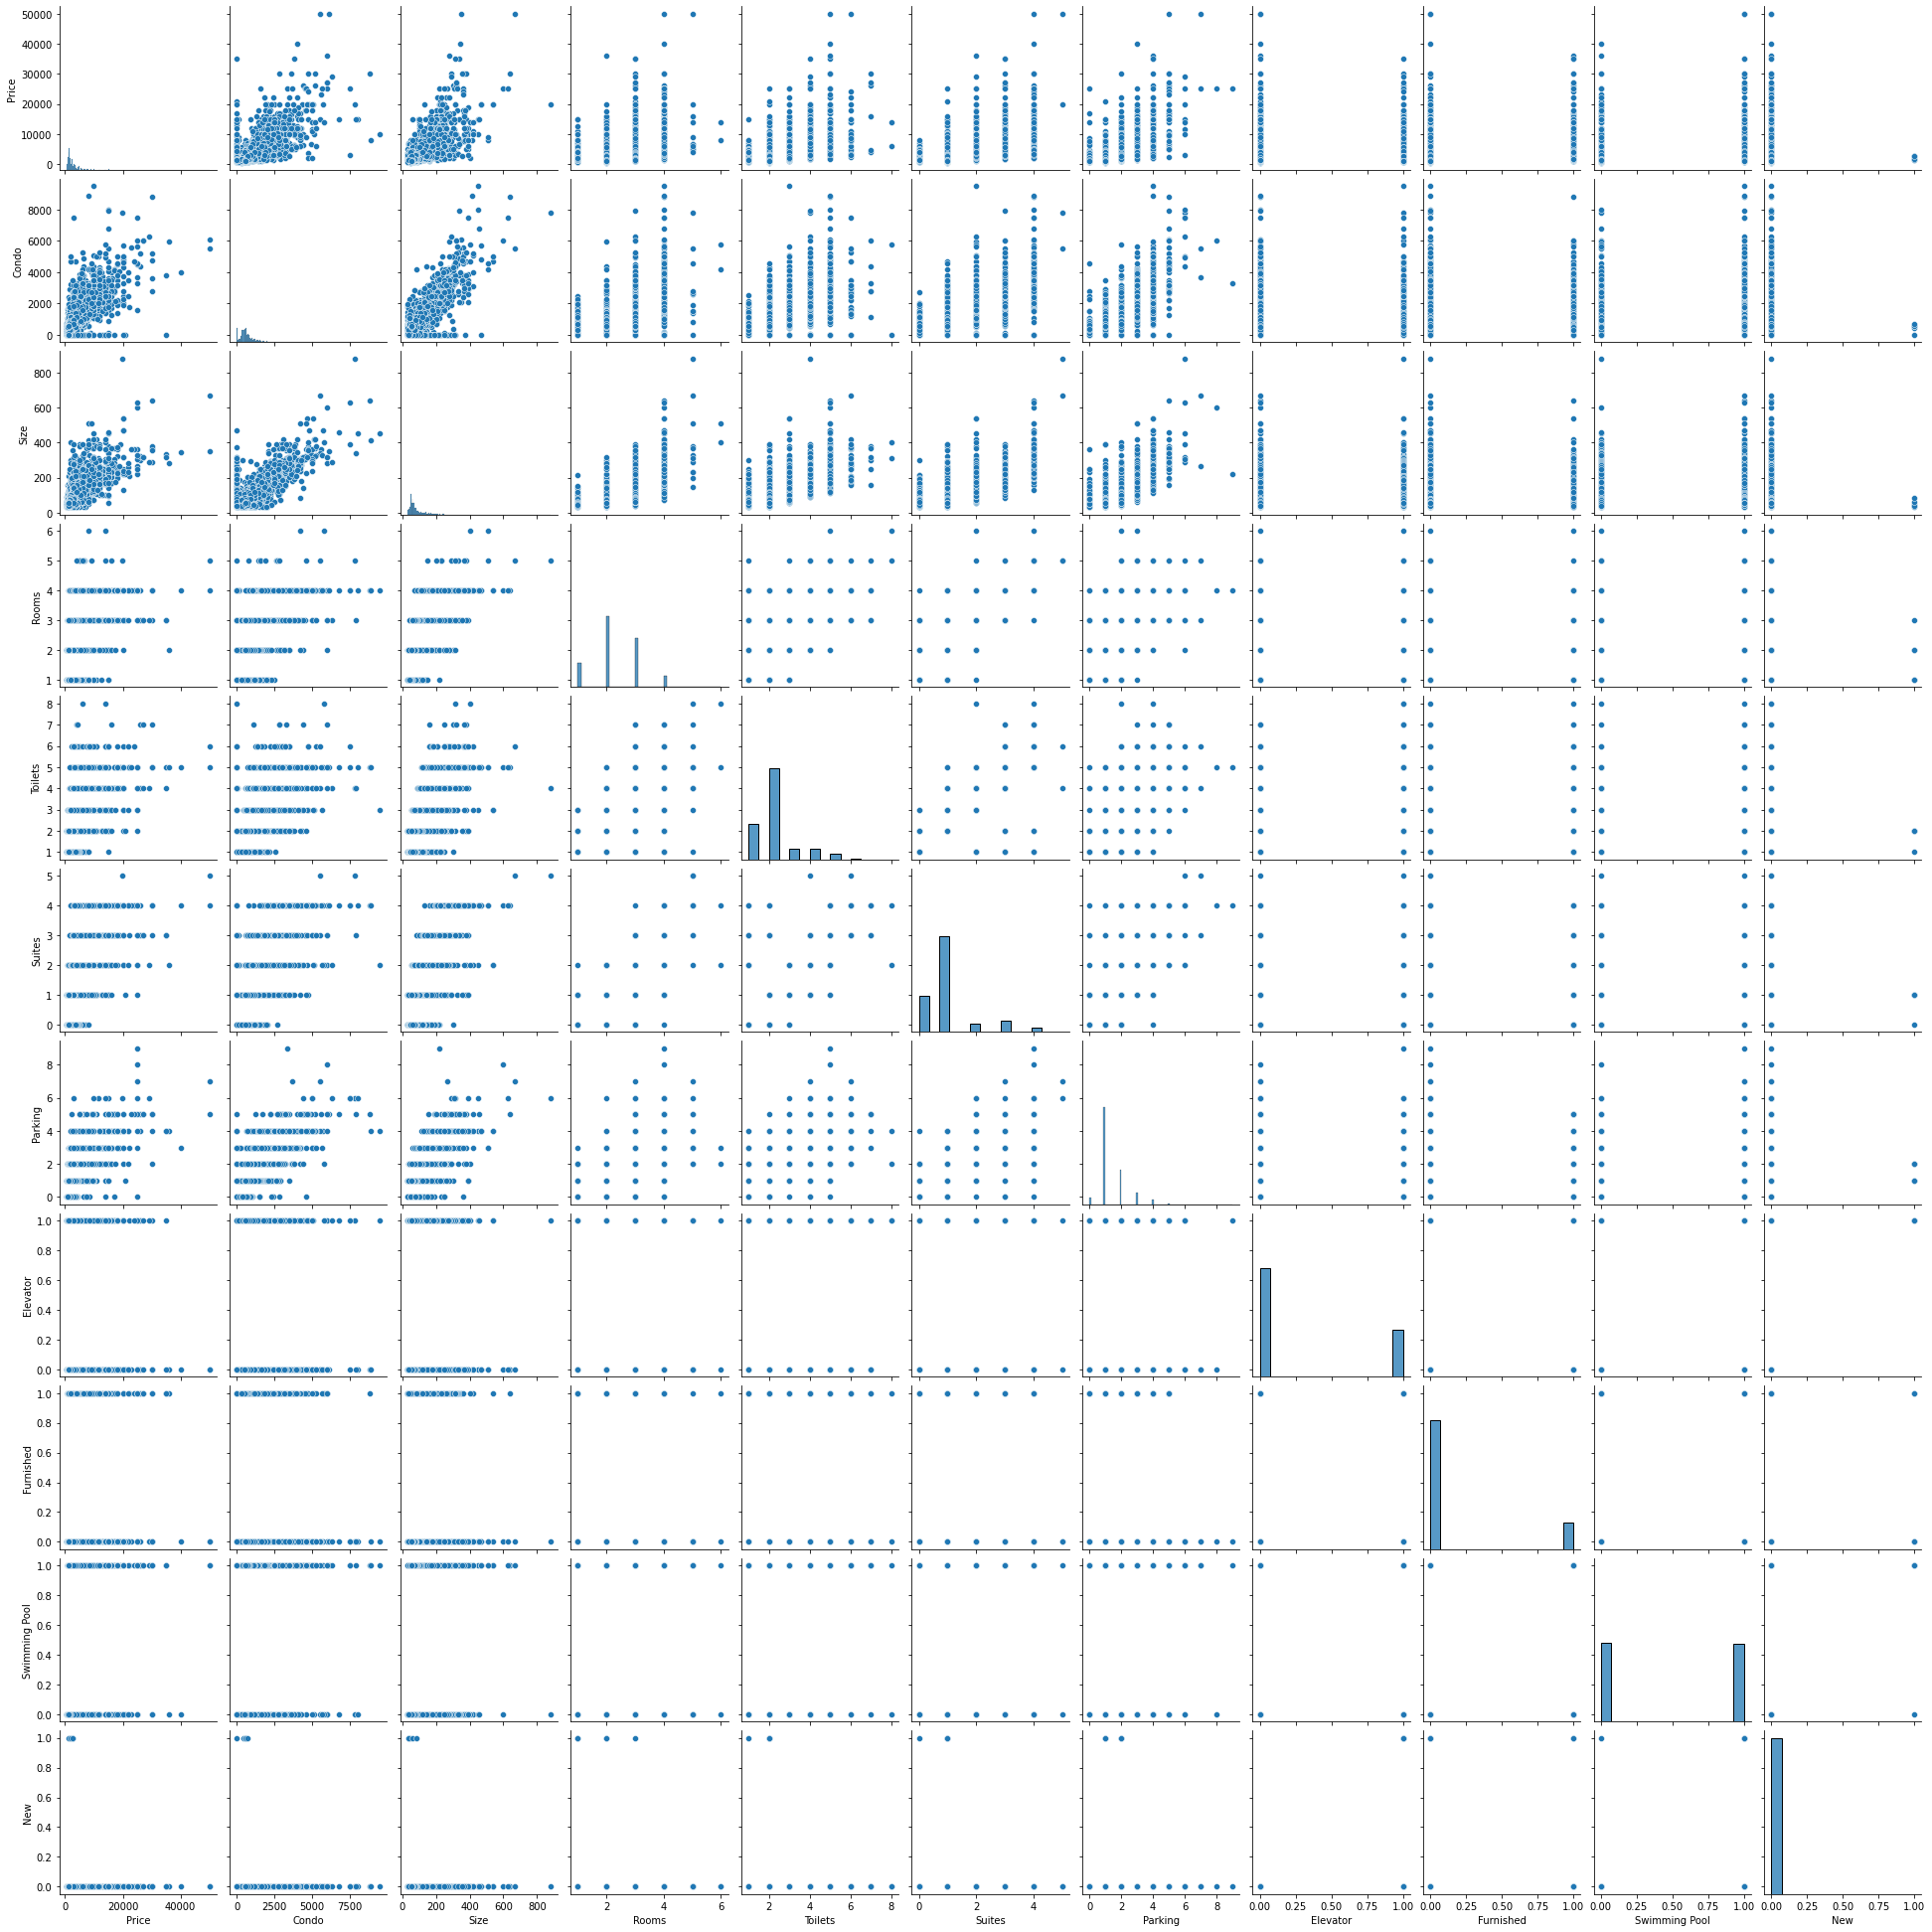

In [30]:
sns.pairplot(data=aluguel_training)

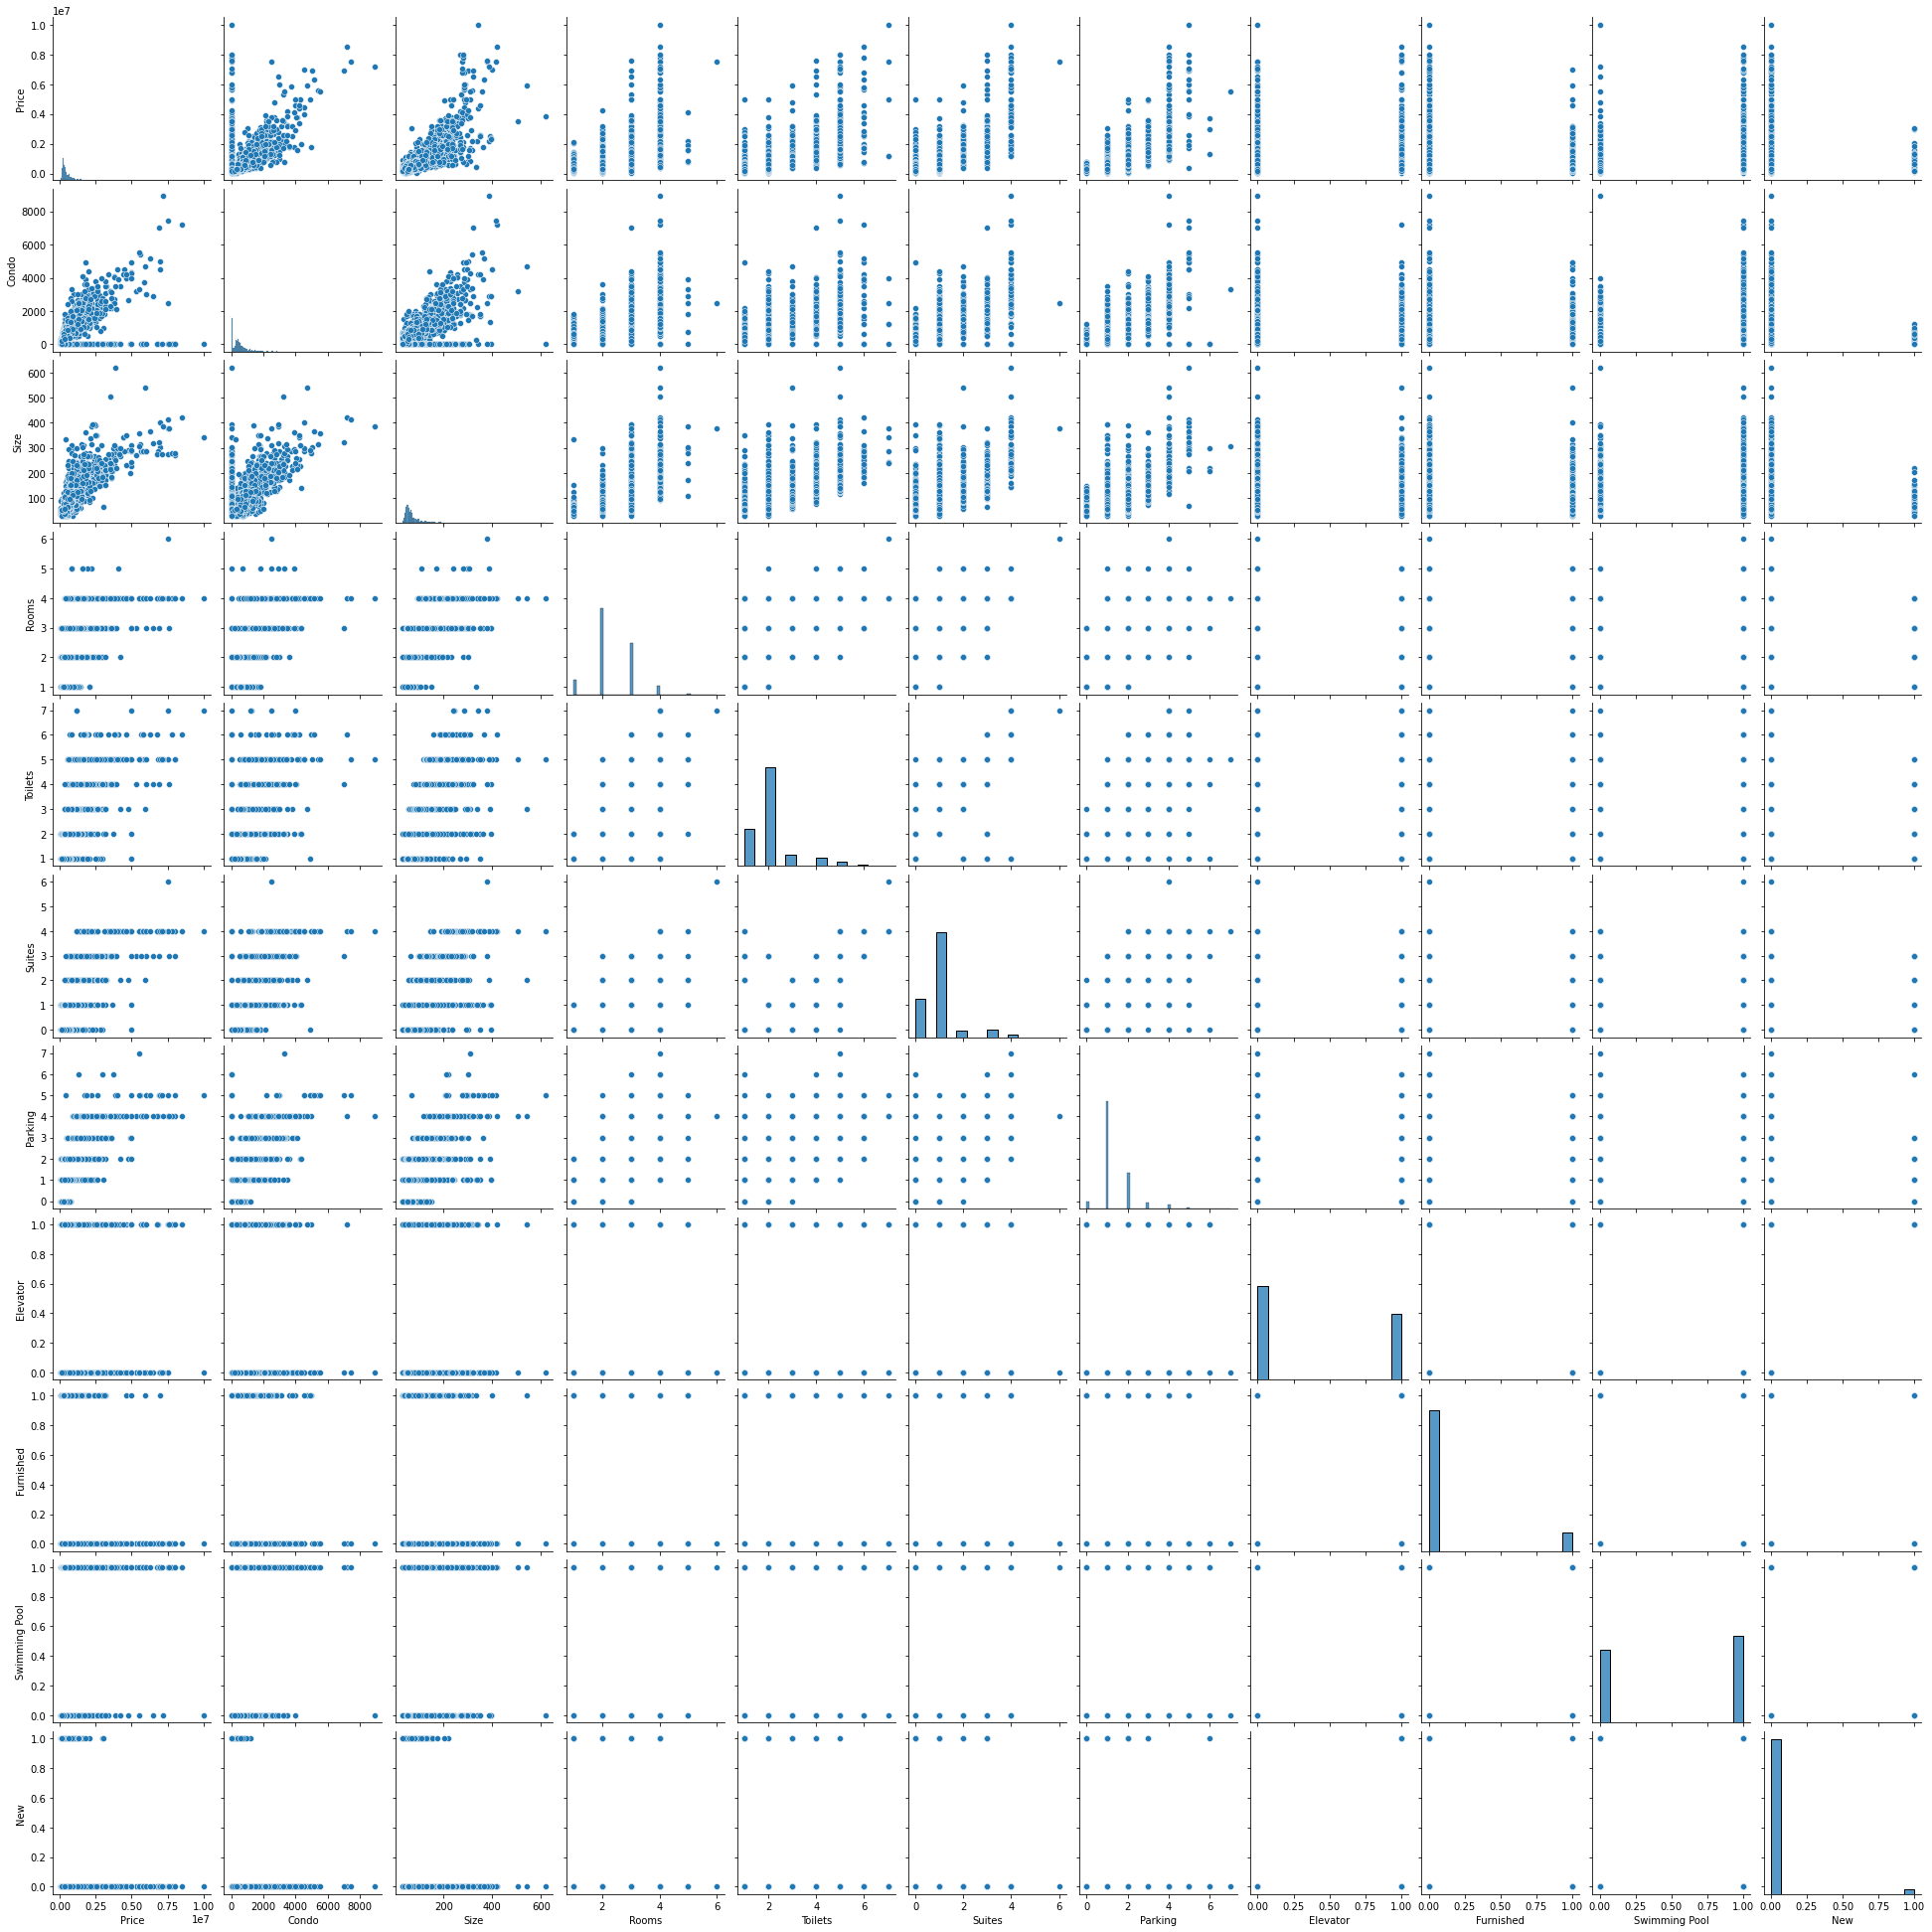

In [31]:
sns.pairplot(data=venda_training)

/tmp/ipykernel_545/2685513168.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



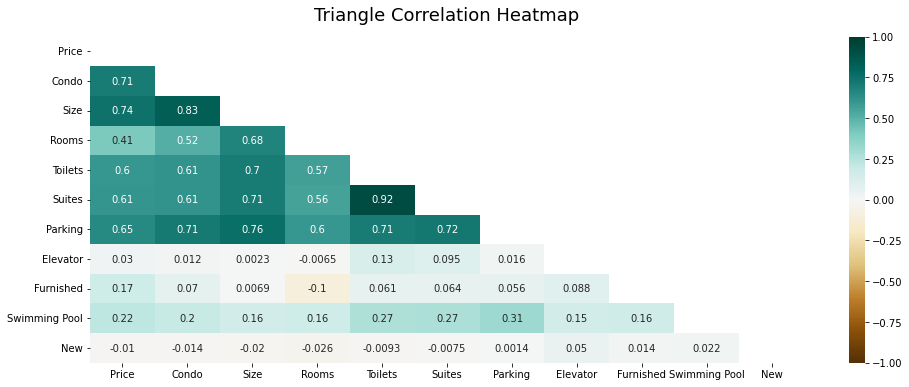

In [32]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(aluguel_training.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(aluguel_training.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/tmp/ipykernel_545/3798921537.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



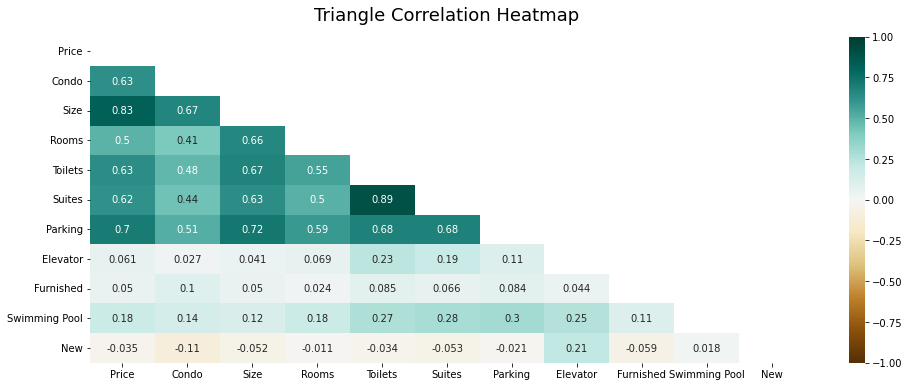

In [33]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(venda_training.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(venda_training.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<p>Nas tabelas impressas é possível perceber que existe uma correlação entre o preço, valor do condomínio e tamanho do imóvel. Esses parâmetros parecem ser promissores para executar a análise a aprtir destes parâmetros</p>

### Criando novas variáveis para enriquecimento do modelo

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

price_col_idx = 0
size_col_idx = 2

class ImoveisFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        n_rows = X.shape[0]
        
        # creating the new features
        price_sqr_m = X[:, price_col_idx] / X[:, size_col_idx]

        # to concatenate the new arrays as columns in our feature matrix, we need to reshape first
        price_sqr_m = price_sqr_m.reshape((n_rows, 1))

        
        # concatenating the new features into the feature matrix X
        X_out = np.hstack((X, price_sqr_m))
        
        return X_out
    
aluguel_training['Price_sqrt_m'] = aluguel_training['Price']/aluguel_training['Size'] 
venda_training['Price_sqrt_m'] = venda_training['Price']/venda_training['Size'] 


In [35]:
aluguel_training.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4723    6500   1600   165      3        4       3        2         0   
2532    1600    486    41      1        1       0        1         0   
5256    3500    800    55      1        2       1        1         1   
3384   14000   2700   242      4        5       4        4         0   
10966   5300    765    56      2        1       0        2         1   

       Furnished  Swimming Pool  New    District Negotiation Type  \
4723           0              0    0   Pinheiros             rent   
2532           0              1    0   República             rent   
5256           0              1    0    Brooklin             rent   
3384           1              1    0  Campo Belo             rent   
10966          1              1    0   Pinheiros             rent   

      Property Type       City  Price_sqrt_m  
4723      apartment  São Paulo     39.393939  
2532      apartment  São Paulo     39.024390  
5256      apartment  São Paulo     63.636364  
3384      apartment  São Paulo     57.851240  
10966     apartment  São Paulo     94.642857

In [36]:
venda_training.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
8001  182900    200    41      2        2       1        1         0   
8314  228000    350    31      1        1       0        1         1   
5924  377800      0    63      3        2       1        1         0   
5965  250000      0    66      2        2       1        1         0   
5480  385000    350    55      1        2       1        1         1   

      Furnished  Swimming Pool  New        District Negotiation Type  \
8001          0              0    0  Raposo Tavares             sale   
8314          0              0    0            Brás             sale   
5924          0              1    0      Vila Maria             sale   
5965          0              1    0        Medeiros             sale   
5480          1              0    0      Bela Vista             sale   

     Property Type       City  Price_sqrt_m  
8001     apartment  São Paulo   4460.975610  
8314     apartment  São Paulo   7354.838710  
5924     apartment  São Paulo   5996.825397  
5965     apartment  São Paulo   3787.878788  
5480     apartment  São Paulo   7000.000000

## 3.1. Distribuição dos dados

In [37]:
aluguel_training.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'City', 'Price_sqrt_m'],
      dtype='object')

In [38]:
atributos_numericos_aluguel = aluguel_training.columns.drop(['District','Negotiation Type', 'Property Type', 'City', 'Price'])
atributos_numericos_vendas = venda_training.columns.drop   (['District','Negotiation Type', 'Property Type', 'City', 'Price'])

In [39]:
atributos_categoricos_aluguel = aluguel_training.columns.drop(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking','Elevator', 'Furnished', 'Swimming Pool', 'New', 'Price_sqrt_m'])                  
atributos_categoricos_venda = venda_training.columns.drop    (['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking','Elevator', 'Furnished', 'Swimming Pool', 'New', 'Price_sqrt_m'])

In [40]:
len(atributos_numericos_vendas)

11

In [41]:
atributos_numericos_aluguel

Index(['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator',
       'Furnished', 'Swimming Pool', 'New', 'Price_sqrt_m'],
      dtype='object')

In [42]:
atributos_numericos_vendas

Index(['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator',
       'Furnished', 'Swimming Pool', 'New', 'Price_sqrt_m'],
      dtype='object')

In [43]:
aluguel_training_num = aluguel_training[atributos_numericos_aluguel]
aluguel_training_num

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
4723    1600   165      3        4       3        2         0          0   
2532     486    41      1        1       0        1         0          0   
5256     800    55      1        2       1        1         1          0   
3384    2700   242      4        5       4        4         0          1   
10966    765    56      2        1       0        2         1          1   
...      ...   ...    ...      ...     ...      ...       ...        ...   
4029     680    57      2        2       1        2         1          0   
9382     533    55      2        2       1        1         0          0   
9417     483    52      2        2       1        1         1          0   
9583       0    36      2        2       1        1         0          0   
927      561    55      2        2       1        1         1          0   

       Swimming Pool  New  Price_sqrt_m  
4723               0    0     39.393939  
2532               1    0     39.024390  
5256               1    0     63.636364  
3384               1    0     57.851240  
10966              1    0     94.642857  
...              ...  ...           ...  
4029               1    0     49.122807  
9382               1    0     25.454545  
9417               0    0     19.230769  
9583               0    0     33.333333  
927                1    0     20.000000  

[5493 rows x 11 columns]

In [44]:
venda_training_num = venda_training[atributos_numericos_vendas]
venda_training_num

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
8001     200    41      2        2       1        1         0          0   
8314     350    31      1        1       0        1         1          0   
5924       0    63      3        2       1        1         0          0   
5965       0    66      2        2       1        1         0          0   
5480     350    55      1        2       1        1         1          1   
...      ...   ...    ...      ...     ...      ...       ...        ...   
11021    830    65      3        2       1        1         1          0   
12587    400    95      3        2       1        2         0          0   
12624    410    54      2        1       0        1         0          1   
12790    180    52      3        1       0        1         0          0   
6060     330    55      2        2       1        1         1          0   

       Swimming Pool  New  Price_sqrt_m  
8001               0    0   4460.975610  
8314               0    0   7354.838710  
5924               1    0   5996.825397  
5965               1    0   3787.878788  
5480               0    0   7000.000000  
...              ...  ...           ...  
11021              1    0   8769.230769  
12587              1    0   6957.894737  
12624              0    0   5000.000000  
12790              0    0   3230.769231  
6060               1    0   5945.454545  

[4971 rows x 11 columns]

# 4. Preparando os dados

In [45]:
aluguel_train_pre = aluguel_training.drop(columns=['Price'])
aluguel_train_target = aluguel_training['Price'].copy()

vendas_train_pre = venda_training.drop(columns=['Price'])
vendas_train_target = venda_training['Price'].copy()

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

cat_pipeline = Pipeline([
    ('one-hot-encoding', OneHotEncoder(handle_unknown='error'))
])

aluguel_pipeline_processed = ColumnTransformer([
    ('numerico', num_pipeline, atributos_numericos_aluguel),
    ('categorico', cat_pipeline, atributos_categoricos_aluguel)
])


vendas_pipeline_processed = ColumnTransformer([
    ('numerico', num_pipeline, atributos_numericos_vendas),
    ('categorico', cat_pipeline, atributos_categoricos_venda)
])


In [47]:
aluguel_train_pre_npy = aluguel_pipeline_processed.fit_transform(aluguel_train_pre)

In [48]:
vendas_train_pre_npy = vendas_pipeline_processed.fit_transform(vendas_train_pre)

In [49]:
aluguel_train_pre_npy.shape

(5493, 108)

In [50]:
vendas_train_pre_npy.shape

(4971, 110)

In [51]:
aluguel_pipeline_processed.named_transformers_

{'numerico': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('robust_scaler', RobustScaler())]),
 'categorico': Pipeline(steps=[('one-hot-encoding', OneHotEncoder())])}

In [52]:
vendas_pipeline_processed.named_transformers_

{'numerico': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('robust_scaler', RobustScaler())]),
 'categorico': Pipeline(steps=[('one-hot-encoding', OneHotEncoder())])}

In [53]:
import joblib

joblib.dump(aluguel_pipeline_processed, './models/aluguel_pipeline_processed.pkl')
joblib.dump(vendas_pipeline_processed, './models/vendas_pipeline_processed.pkl')

['./models/vendas_pipeline_processed.pkl']

In [54]:
np.save('./datasets/aluguel_train_pre_npy.npy', aluguel_train_pre_npy)
np.save('./datasets/vendas_train_pre_npy.npy', vendas_train_pre_npy)

In [55]:
y_aluguel_train = aluguel_training['Price'].values
y_vendas_train = venda_training['Price'].values

In [56]:
X_aluguel_train = aluguel_train_pre_npy
X_vendas_train = vendas_train_pre_npy

In [57]:
X_aluguel_train.shape

(5493, 108)

In [58]:
y_aluguel_train.shape

(5493,)

In [59]:
# printing function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_aluguel_scores = cross_val_score(lin_reg, X_aluguel_train, y_aluguel_train, scoring="neg_mean_squared_error", cv=10)

lin_aluguel_rmse_scores = np.sqrt(-lin_aluguel_scores)

lin_vendas_scores = cross_val_score(lin_reg, X_vendas_train, y_vendas_train, scoring="neg_mean_squared_error", cv=10)

lin_vendas_rmse_scores = np.sqrt(-lin_vendas_scores)

In [61]:
display_scores(lin_vendas_rmse_scores)

Scores: [258017.21393777 214002.17545114 251306.10559481 249094.1051007
 174182.22404799 316005.08207245 284832.45690122 209625.40513898
 197577.04715294 249658.88406987]
Mean: 240430.06994678584
Standard deviation: 40178.982510366346


In [62]:
display_scores(lin_aluguel_rmse_scores)

Scores: [1304.70320851 1254.12680447 1793.18861875 1413.13728901 1319.72962431
 1403.68508239 1772.15436693  964.48754681 1136.98031406 1297.32415652]
Mean: 1365.9517011759651
Standard deviation: 242.46361503793253


In [63]:
lin_reg_aluguel = LinearRegression()
lin_reg_vendas = LinearRegression()
lin_aluguel_fit = lin_reg_aluguel.fit(X_aluguel_train, y_aluguel_train)
lin_vendas_fit = lin_reg_vendas.fit(X_vendas_train, y_vendas_train)

In [64]:
### salvando o modelo
import joblib
joblib.dump(lin_aluguel_fit, './models/lin_aluguel_fit.pkl')
joblib.dump(lin_vendas_fit, './models/lin_vendas_fit.pkl')

['./models/lin_vendas_fit.pkl']

# 5. Avaliando modelo nos conjuntos de teste

In [65]:
teste_aluguel = pd.read_csv('./datasets/aluguel_test.csv')
teste_vendas = pd.read_csv('./datasets/venda_test.csv')

In [66]:
### Adicionando novas features
teste_aluguel['Price_sqrt_m'] = teste_aluguel['Price']/teste_aluguel['Size'] 
teste_vendas['Price_sqrt_m'] = teste_vendas['Price']/teste_vendas['Size'] 

In [67]:
### Separate the _features_ and the _target outcome_
y_aluguel_test = teste_aluguel['Price'].values
y_vendas_test = teste_vendas['Price'].values

In [68]:
teste_vendas.shape

(1243, 18)

In [69]:
teste_aluguel.shape

(1374, 18)

In [70]:
teste_aluguel = teste_aluguel.drop(columns=['Price', 'Latitude', 'Longitude'])
teste_vendas = teste_vendas.drop(columns=['Price', 'Latitude', 'Longitude'])

In [71]:
import joblib
preprocessed_aluguel_pipeline = joblib.load('./models/aluguel_pipeline_processed.pkl')
preprocessed_venda_pipeline = joblib.load('./models/vendas_pipeline_processed.pkl')

X_aluguel_test = preprocessed_aluguel_pipeline.transform(teste_aluguel)
X_vendas_test = preprocessed_venda_pipeline.transform(teste_vendas)

In [72]:
X_aluguel_test.shape

(1374, 108)

In [73]:
X_vendas_test.shape

(1243, 110)

In [74]:
lin_aluguel_reg = joblib.load('./models/lin_aluguel_fit.pkl')
lin_vendas_reg = joblib.load('./models/lin_vendas_fit.pkl')

In [75]:
###Avaliação
y_teste_aluguel_pred = lin_aluguel_reg.predict(X_aluguel_test)
y_teste_vendas_pred = lin_vendas_reg.predict(X_vendas_test)

In [76]:
from sklearn.metrics import mean_squared_error

lin_rmse_vendas_test = mean_squared_error(y_vendas_test, y_teste_vendas_pred, squared=False)
lin_rmse_aluguel_test = mean_squared_error(y_aluguel_test, y_teste_aluguel_pred, squared=False)
print(f'RMSE Lin. Reg. no conjunto de teste de aluguel: {lin_rmse_aluguel_test}')
print(f'RMSE Lin. Reg. no conjunto de teste de vendas: {lin_rmse_vendas_test}')

RMSE Lin. Reg. no conjunto de teste de aluguel: 1939.2650172546612
RMSE Lin. Reg. no conjunto de teste de vendas: 234291.93875213905


In [77]:
confidence_level = 0.95
n = len(y_vendas_test)  # the number of testing examples/instances

In [78]:
squared_errors_aluguel = (y_teste_aluguel_pred - y_aluguel_test) ** 2
squared_errors_vendas = (y_teste_vendas_pred - y_vendas_test) ** 2

In [79]:
standard_error_aluguel = squared_errors_aluguel.std() / np.sqrt(n)
standard_error_vendas = squared_errors_vendas.std() / np.sqrt(n)

In [80]:
## alternatively
from scipy import stats
stats_aluguel = stats.sem(squared_errors_aluguel, ddof=0)
stats_vendas = stats.sem(standard_error_vendas, ddof=0)

In [81]:
from scipy.stats import norm

confidence_interval_squared_errors_aluguel = norm.interval(alpha=confidence_level, loc=squared_errors_aluguel.mean(), scale=standard_error_aluguel)
confidence_interval_squared_errors_vendas = norm.interval(alpha=confidence_level, loc=squared_errors_vendas.mean(), scale=standard_error_vendas)

In [82]:
np.sqrt(confidence_interval_squared_errors_aluguel)

array([1463.08200673, 2319.67425642])

In [83]:
np.sqrt(confidence_interval_squared_errors_vendas)

array([170574.23048992, 284059.60117772])

Text(0.5, 1.0, 'Preço de aluguel - Predição vs Real - Decision Tree Regression')

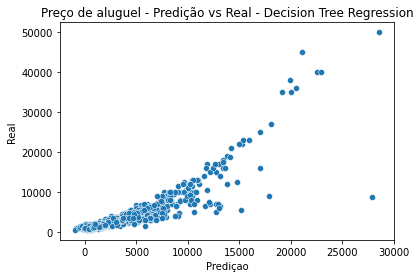

In [115]:
sns.scatterplot(x=y_teste_aluguel_pred, y=y_aluguel_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de aluguel - Predição vs Real - Linear Regression')

Text(0.5, 1.0, 'Preço de aluguel - Predição vs Real - Linear Regression')

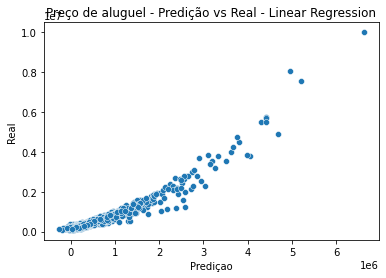

In [116]:
sns.scatterplot(x=y_teste_vendas_pred, y=y_vendas_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de aluguel - Predição vs Real - Linear Regression')

## Usando Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_aluguel = DecisionTreeRegressor()
tree_reg_vendas = DecisionTreeRegressor()
tree_reg_aluguel.fit(X_aluguel_train, y_aluguel_train)
tree_reg_vendas.fit(X_vendas_train, y_vendas_train)

DecisionTreeRegressor()

In [85]:
y_test_tree_aluguel_pred = tree_reg_aluguel.predict(X_aluguel_test)
y_test_tree_vendas_pred = tree_reg_vendas.predict(X_vendas_test)

In [86]:
from sklearn.metrics import r2_score

tree_reg_r2_aluguel = r2_score(y_aluguel_test, y_test_tree_aluguel_pred)
print(f'R² decision tree regression aluguel = {tree_reg_r2_aluguel}')

tree_reg_r2_vendas = r2_score(y_vendas_test, y_test_tree_vendas_pred)
print(f'R² decision tree regression vendas = {tree_reg_r2_vendas}')

R² decision tree regression aluguel = 0.9631547066263877
R² decision tree regression vendas = 0.984871141126806


Text(0.5, 1.0, 'Preço de aluguel - Predição vs Real - Decision Tree Regression')

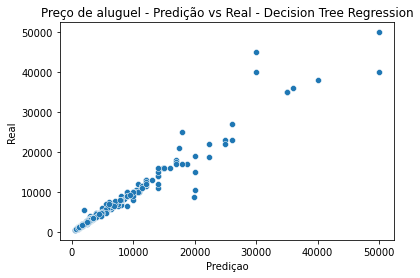

In [87]:
sns.scatterplot(x=y_test_tree_aluguel_pred, y=y_aluguel_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de aluguel - Predição vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Preço de vendas - Predição vs Real - Decision Tree Regression')

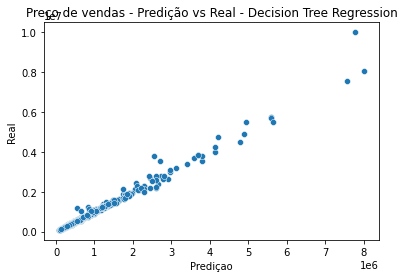

In [88]:
sns.scatterplot(x=y_test_tree_vendas_pred, y=y_vendas_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de vendas - Predição vs Real - Decision Tree Regression')

In [96]:
tree_neg_mse_scores_aluguel = cross_val_score(tree_reg_aluguel, X_aluguel_test, y_aluguel_test, cv=10, scoring='neg_mean_squared_error')
tree_neg_mse_scores_vendas = cross_val_score(tree_reg_vendas, X_vendas_test, y_vendas_test, cv=10, scoring='neg_mean_squared_error')

tree_rmse_scores_aluguel = np.sqrt(-tree_neg_mse_scores_aluguel)
tree_rmse_scores_vendas = np.sqrt(-tree_neg_mse_scores_vendas)

In [90]:
display_scores(tree_rmse_scores_aluguel)

Scores: [ 508.34442848 1013.30639028  546.5710702  1183.0006738  1203.47947499
 1093.74587048  479.49049145  594.56589083  958.80918388  545.44565587]
Mean: 812.6759130256522
Standard deviation: 287.0368707768066


In [91]:
display_scores(tree_rmse_scores_vendas)

Scores: [352197.42628596 136356.94890887 216804.27712499 141001.51200296
 170121.23002756 176190.90188868  98501.83226149 136517.17562149
 251673.59573116 116093.2865274 ]
Mean: 179545.81863805608
Standard deviation: 72315.98899196737


## Randon Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

forest_aluguel = RandomForestRegressor()
forest_vendas = RandomForestRegressor()

forest_aluguel.fit(X_aluguel_train, y_aluguel_train)
forest_vendas.fit(X_vendas_train, y_vendas_train)



RandomForestRegressor()

In [108]:
resultado_forest_aluguel = forest_aluguel.predict(X_aluguel_test)
resultado_forest_vendas = forest_vendas.predict(X_vendas_test)

cross_resultado_forest_aluguel = cross_val_score(forest_aluguel, X_aluguel_test, y_aluguel_test, cv=10, scoring='neg_mean_squared_error')
cross_resultado_forest_vendas = cross_val_score(forest_vendas, X_vendas_test, y_vendas_test, cv=10, scoring='neg_mean_squared_error')


y_test_forest_aluguel_pred = tree_reg_aluguel.predict(X_aluguel_test)
y_test_forest_vendas_pred = tree_reg_vendas.predict(X_vendas_test)


forest_scores_aluguel = np.sqrt(-cross_resultado_knn_aluguel)
forest_scores_vendas = np.sqrt(-cross_resultado_knn_vendas)

In [109]:
display_scores(forest_scores_aluguel)

Scores: [3361.0053383  2321.21328688 1551.15172031 1868.09018185 3800.38600805
 1501.89910194 2072.37956075 1536.70313514 1041.95893554 1206.20971171]
Mean: 2026.0996980468196
Standard deviation: 861.6779742972645


In [111]:
display_scores(forest_scores_vendas)

Scores: [521666.64342418 385318.75184658 140842.63266838 287414.64367819
 425347.88123854 162851.26639472 216784.04132616 511312.87619684
 362285.54059957 260413.89161272]
Mean: 327423.816898587
Standard deviation: 128814.06526096027


Text(0.5, 1.0, 'Preço de aluguel - Predição vs Real - Random Forest Regression')

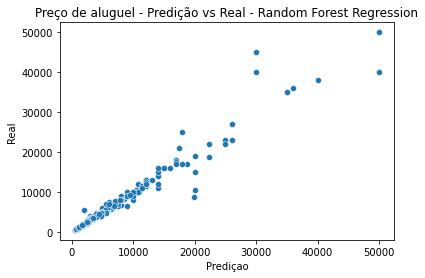

In [112]:
sns.scatterplot(x=y_test_forest_aluguel_pred, y=y_aluguel_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de aluguel - Predição vs Real - Random Forest Regression')

Text(0.5, 1.0, 'Preço de Vendas - Predição vs Real - Random Forest Regression')

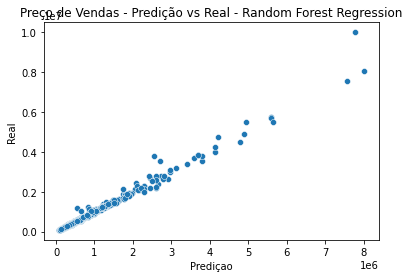

In [114]:
sns.scatterplot(x=y_test_forest_vendas_pred, y=y_vendas_test)
plt.xlabel('Prediçao')
plt.ylabel('Real')
plt.title('Preço de Vendas - Predição vs Real - Random Forest Regression')

## Conclusões

Analisando os algoritmos aplicados os modelo criado foi perceptível que a <b>regressão linear</b> obteve um resultado um melhor resultado tendo uma mediana menor assim como o desvio padrão.
Em uma análise mais aprofundada é possível perceber que todos os modelos possuem comportamentos bastante diferentes. Neles é possível perceber que os resultados dos algoritmos de decision tree e random forest tem um desepenho pior quando comparados com o algoritmo de regressão linear.<br>
Não foram aplicado nenhum tunnig no modelo isso poderia modificar os números observados.<br>
Outro ponto que pode ser observado é que os algoritmos do random forest e decision tree tem uma maior tendência ao overfitting, quando comparados a regressão linear.

# Trabalhos futuros

Para melhorias futuras uma boa opção seria aplicar um tunning no modelo e realizar novos treinos a fim de verificar se os resultados apresentados sofrerão mudanças.